In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

Calculations of two correlators (propagator and cube propagator) for a harmonic oscillator using metropolis algorithm.
We have computed the propagator using several procedure: using a "pure" metropolis, with the bootstrap procedure and with the binning procedure.

In [2]:
E_0 = 0.5
E_1 = 1.5

In [3]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cfs=[25, 100, 1000, 10000]

In [4]:
t = np.arange(N-1) * a
E_exact = np.ones(N-1) * (a*(E_1-E_0)) #expected energy

In [5]:
def S_per_timeslice(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1+N)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

In [6]:
harmonic_oscillator = NonRelativisticSingleParticle1D(T=a*N, N=N, S_per_timeslice=S_per_timeslice)

---
---

Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator

In [7]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [10]:
delta_Es = []
error_delta_Es = []
for N_cf in N_cfs:
    delta_E, error_delta_E = harmonic_oscillator.compute_delta_E(compute_G, N_cf, N_cor, eps)
    delta_Es.append(delta_E[:14])
    error_delta_Es.append(error_delta_E[:14])

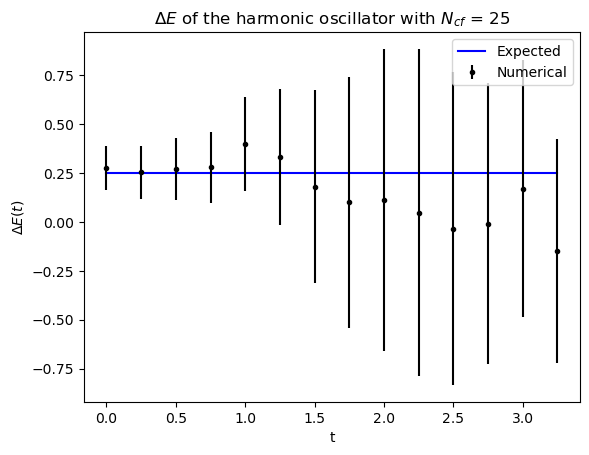

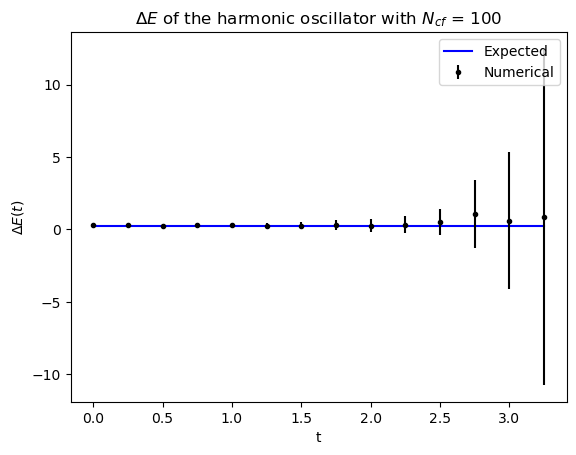

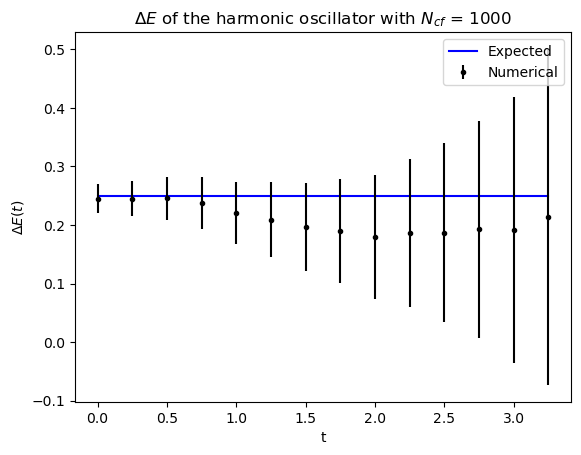

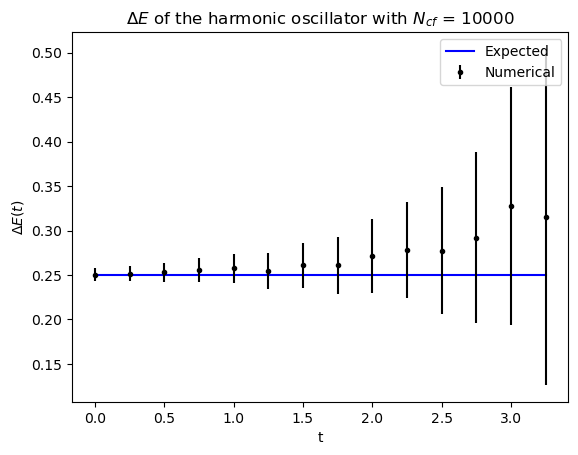

In [11]:
tt = t[:14]
for i in range(len(delta_Es)):
    plt.plot(tt, E_exact[:14], color='blue', label='Expected')
    plt.errorbar(tt, delta_Es[i], yerr=error_delta_Es[i], fmt='.', color='black', label='Numerical')
    plt.title(f'$\Delta E$ of the harmonic oscillator with $N_{{cf}}$ = {N_cfs[i]}')
    plt.xlabel('t')
    plt.ylabel(r'$\Delta E(t)$')
    plt.legend()
    plt.show()

---
---

Calculation of the correlation function 
$$
    G_{cube}(t) = \frac{1}{N} \sum_j \langle x^3(t_j+t)x^3(t_j) \rangle
$$
for a one dimensional harmonic oscillator

In [12]:
def compute_G_cube(x,n):
    g = 0
    for j in range(0,N):        
        g = g + (x[j]*x[(j+n)%N])**3
    return g/N

In [13]:
delta_Es = []
error_delta_Es = []
for N_cf in N_cfs:
    delta_E, error_delta_E = harmonic_oscillator.compute_delta_E(compute_G_cube, N_cf, N_cor, eps)
    delta_Es.append(delta_E[:14])
    error_delta_Es.append(error_delta_E[:14])

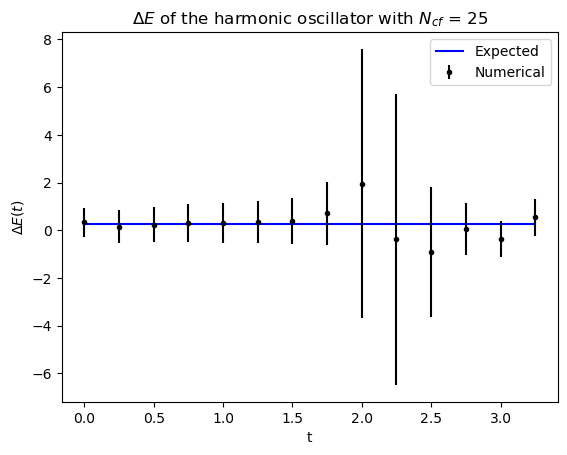

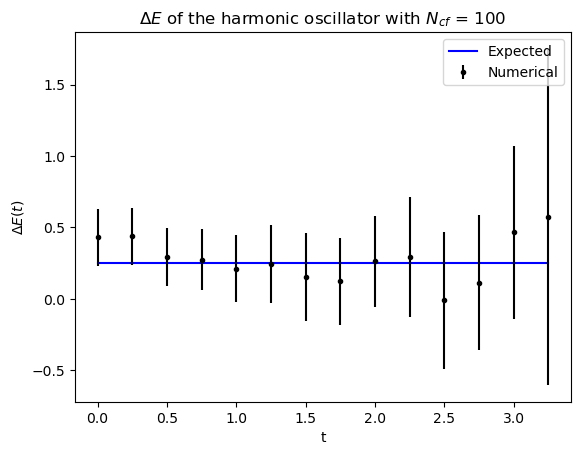

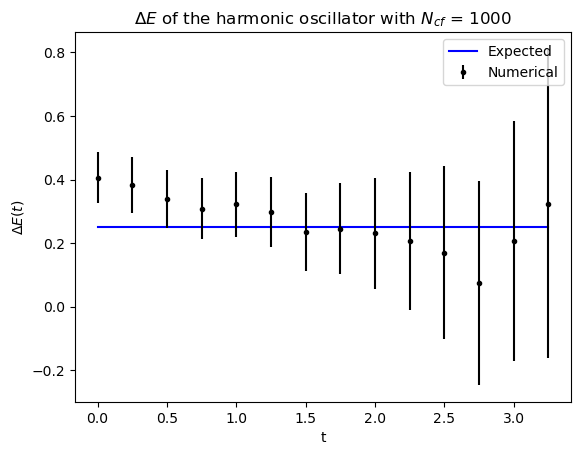

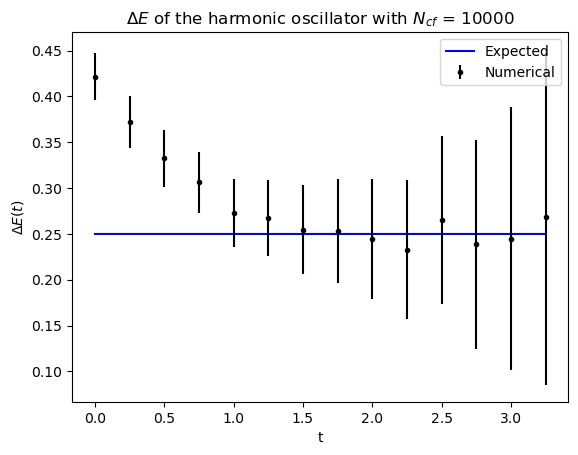

In [14]:
for i in range(len(delta_Es)):
    plt.plot(tt, E_exact[:14], color='blue', label='Expected')
    plt.errorbar(tt, delta_Es[i], yerr=error_delta_Es[i], fmt='.', color='black', label='Numerical')
    plt.title(f'$\Delta E$ of the harmonic oscillator with $N_{{cf}}$ = {N_cfs[i]}')
    plt.xlabel('t')
    plt.ylabel(r'$\Delta E(t)$')
    plt.legend()
    plt.show()

---
---

Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator using bootstrap procedure

In [15]:
N_copies = 20

In [16]:
average_delta_E_with_bootstrap, std_delta_E_with_boostrap = harmonic_oscillator.compute_delta_E(compute_G, 10000, N_cor, eps, N_copies=N_copies)

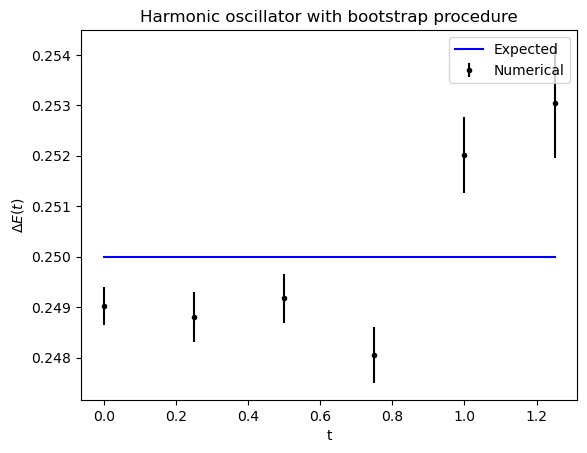

In [19]:
plt.plot(t[:6], E_exact[:6] ,'b',label='Expected')
plt.errorbar(t[:6], average_delta_E_with_bootstrap[:6], yerr=std_delta_E_with_boostrap[:6],color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with bootstrap procedure')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()

t_new = np.arange(N)*a

plt.scatter(t_new, avg_1000, color='black' )
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with bootstrap procedure')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()

We observe that G is close to zero for $t = \frac{Na}{2} $, hence the error associated to G is higher in this region due to the error propagation formula.
We also see the same behaviour using the bootstrap procedure.

---
---

Running of the metropolis simulation using $N_{cor}$=1.

In [19]:
average_delta_E, std_delta_E = harmonic_oscillator.compute_delta_E(compute_G, 5000, 1, eps, N_copies=N_copies)

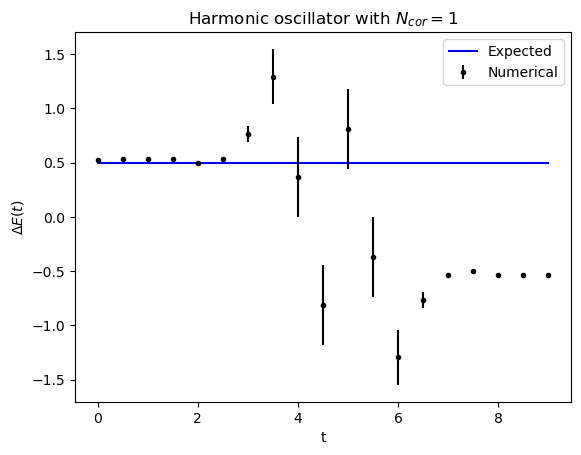

In [17]:
plt.plot(t, E_exact ,'b',label='Expected')
plt.errorbar(t, average_delta_E, yerr=std_delta_E,color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with $N_{cor} = 1$')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()

The errors are unrelaible as expected

Binning procedure 

In [18]:
avg_binning , std_binning = harmonic_oscillator.compute_delta_E(compute_G, 5000, 1, eps, N_copies=N_copies, bin_size=20)

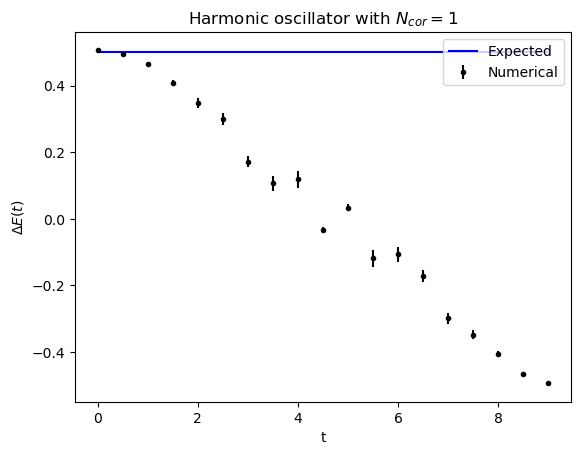

In [19]:
plt.plot(t, E_exact ,'b',label='Expected')
plt.errorbar(t, avg_binning, yerr=std_binning, color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with $N_{cor} = 1$')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()

---
---

Harmonic oscillator with improved action

The new action is 
$$
    S_{imp}[x] = \sum_{j=0}^{N-1} a  \left(-\frac{1}{2}x_j \left(\Delta^{(2)} -a^2 \frac{(\Delta^{(2)})^2}{12} -1 \right)x_j \right)
$$
where $\Delta^{(2)}$ is the discretize second derivative. meaning that
$$
    \Delta^{(2)} x_j = \frac{x_{j+1}-2x_j+x_{j+1}}{a^2}
$$

In [36]:
def S_per_timeslice_improved(j,x): # harm. osc. S
    jpp = (j+2)%N
    jp = (j+1)%N
    jm = (j-1+N)%N
    jmm = (j-2+N)%N
    S_per_component = -0.5*x[j]*(2*x[jp] - 2*x[j] + 2*x[jm] - (2*x[jpp] - 8*x[jp] + 6*x[j] - 8*x[jm] + 2*x[jmm])/12)/a + a*0.5*x[j]**2
    return S_per_component

In [37]:
harmonic_oscillator_improved = NonRelativisticSingleParticle1D(T=a*N, N=N, S_per_timeslice=S_per_timeslice_improved)

In [57]:
average_delta_E_with_bootstrap_improved, std_delta_E_with_boostrap_improved = harmonic_oscillator_improved.compute_delta_E(compute_G, N_cf=1000, N_cor=N_cor, eps=eps, N_copies=N_copies)

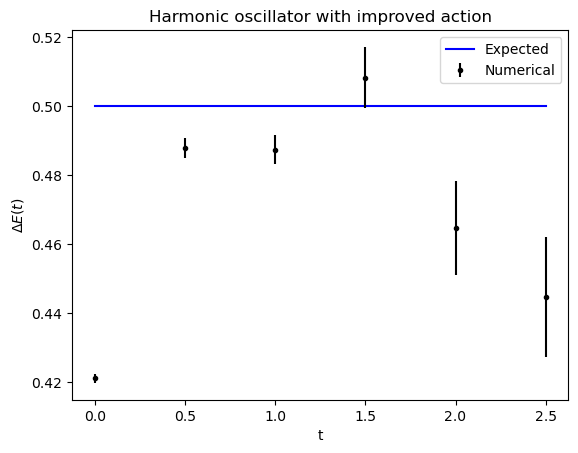

In [59]:
plt.plot(t[:12], E_exact[:12] ,'b',label='Expected')
plt.errorbar(t[:12], average_delta_E_with_bootstrap_improved[:12], yerr=std_delta_E_with_boostrap_improved[:12],color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with improved action')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()